#**TripMate**


## **1. Import Library**

In [1]:
# For data processing
import pandas as pd
import numpy as np

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For modelling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

##**2. Upload Dataset**

In [2]:
# URL of raw file dataset in GitHub repository
place = 'https://raw.githubusercontent.com/Firyalanissafiyah/CAPSTONE/main/dataset/tourism_with_id.csv'
rating = 'https://raw.githubusercontent.com/Firyalanissafiyah/CAPSTONE/main/dataset/tourism_rating.csv'
user = 'https://raw.githubusercontent.com/Firyalanissafiyah/CAPSTONE/main/dataset/user.csv'

##**3. Data Preprocessing**

**a. Place**

In [3]:
# Load data 'place' from URL to DataFrame
place = pd.read_csv(place)

In [4]:
# Viewing overview of the 'place' data
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [5]:
# Dropping unused columns
place = place.drop(['Unnamed: 11','Unnamed: 12', 'Time_Minutes', 'Coordinate', 'Lat', 'Long'], axis=1)
place.head(3)

,Place_Id,Place_Name,Description,Category,City,Price,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6


In [6]:
# Delete rows that have a value of 0 in the Price column
place = place[place['Price'] != 0]
place.head(10)

,Place_Id,Place_Name,Description,Category,City,Price,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5
5,6,Taman Impian Jaya Ancol,Taman Impian Jaya Ancol merupakan sebuah objek...,Taman Hiburan,Jakarta,25000,4.5
6,7,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Cagar Alam,Jakarta,4000,4.5
7,8,Ocean Ecopark,Ocean Ecopark Salah satu zona rekreasi Ancol y...,Taman Hiburan,Jakarta,180000,4.0
8,9,Pelabuhan Marina,Pelabuhan Marina Ancol berada di kawasan Taman...,Bahari,Jakarta,175000,4.4
9,10,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Bahari,Jakarta,150000,4.5
10,11,Pulau Bidadari,Pulau Bidadari merupakan salah satu resor di K...,Bahari,Jakarta,5000,4.6


In [7]:
# Information about the DataFrame 'place'
place.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 436
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     300 non-null    int64  
 1   Place_Name   300 non-null    object 
 2   Description  300 non-null    object 
 3   Category     300 non-null    object 
 4   City         300 non-null    object 
 5   Price        300 non-null    int64  
 6   Rating       300 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 18.8+ KB


**b. Rating**

In [8]:
# Load 'rating' data from URL to DataFrame
rating = pd.read_csv(rating)

In [9]:
# Viewing overview of the rating data
rating.head(3)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5


In [10]:
# Information about the DataFrame 'rating'
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [11]:
# Filtering the rating data to include only ratings for tourist attractions
place_rating = pd.merge(rating, place[['Place_Id', 'Category', 'City', 'Price', 'Place_Name']], on='Place_Id', how='left')
place_rating

,User_Id,Place_Id,Place_Ratings,Category,City,Price,Place_Name
0,1,179,3,Budaya,Yogyakarta,75000.0,Candi Ratu Boko
1,1,344,2,Bahari,Semarang,3000.0,Pantai Marina
2,1,5,5,Taman Hiburan,Jakarta,94000.0,Atlantis Water Adventure
3,1,373,3,Budaya,Semarang,10000.0,Museum Kereta Ambarawa
4,1,101,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9995,300,425,2,Taman Hiburan,Surabaya,35000.0,Waterpark Kenjeran Surabaya
9996,300,64,4,Budaya,Jakarta,2000.0,Museum Sasmita Loka Ahmad Yani
9997,300,311,3,Cagar Alam,Bandung,25000.0,The Lodge Maribaya
9998,300,279,4,NaN,NaN,NaN,NaN


In [12]:
# Information about shape of 'place_rating' DataFrame
place_rating.shape

(10000, 7)

In [13]:
# Information about the DataFrame 'place_rating'
place_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        10000 non-null  int64  
 1   Place_Id       10000 non-null  int64  
 2   Place_Ratings  10000 non-null  int64  
 3   Category       6818 non-null   object 
 4   City           6818 non-null   object 
 5   Price          6818 non-null   float64
 6   Place_Name     6818 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 547.0+ KB


**c. User**

In [14]:
# Load data 'user' from URL to DataFrame
user = pd.read_csv(user)

In [15]:
# Viewing overview of the user data
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [16]:
# Viewing the dataset of users who have rated tourist attractions in Bandung City
user.shape

(300, 3)

##**4. Exploratory Data**

               Jumlah rating  Persentase
Place_Ratings                           
4                       2106        21.1
3                       2096        21.0
2                       2071        20.7
5                       2021        20.2
1                       1706        17.1


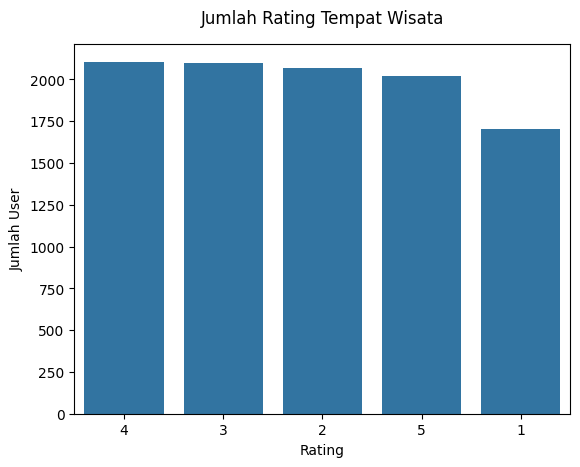

In [17]:
# Create a visualization of the number of tourist attractions rating
count = place_rating['Place_Ratings'].value_counts()
percent = 100 * place_rating['Place_Ratings'].value_counts(normalize = True)
df = pd.DataFrame({'Jumlah rating' : count, 'Persentase' : percent.round(1)})
print(df)
sns.countplot(x = place_rating['Place_Ratings'], data = place_rating, order = place_rating['Place_Ratings'].value_counts().index)
plt.title('Jumlah Rating Tempat Wisata', pad=15)
plt.xlabel('Rating')
plt.ylabel('Jumlah User')
plt.show()

               Jumlah rating  Persentase
Category                                
Taman Hiburan           2072        30.4
Cagar Alam              1998        29.3
Budaya                  1631        23.9
Bahari                  1079        15.8
Tempat Ibadah             38         0.6


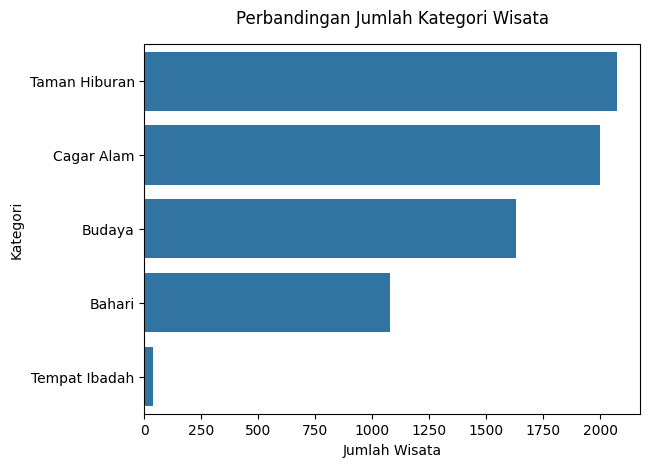

In [18]:
# Create a visualization of the number of tourist categories based on the number of ratings
count = place_rating['Category'].value_counts()
percent = 100 * place_rating['Category'].value_counts(normalize = True)
df = pd.DataFrame({'Jumlah rating' : count, 'Persentase' : percent.round(1)})
print(df)
sns.countplot(y = place_rating['Category'], data = place_rating, order = place_rating['Category'].value_counts().index)
plt.title('Perbandingan Jumlah Kategori Wisata', pad=15)
plt.xlabel('Jumlah Wisata')
plt.ylabel('Kategori')
plt.show()

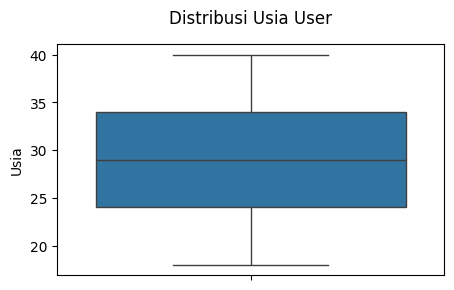

In [19]:
# Create a visualization of user age distribution
plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=15)
plt.ylabel('Usia')
plt.show()

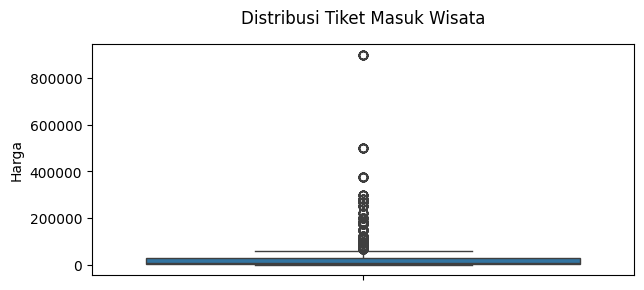

In [20]:
# Create a visualization of tourist attraction price distribution
plt.figure(figsize=(7,3))
sns.boxplot(place_rating['Price'])
plt.title('Distribusi Tiket Masuk Wisata', pad=15)
plt.ylabel('Harga')
plt.show()

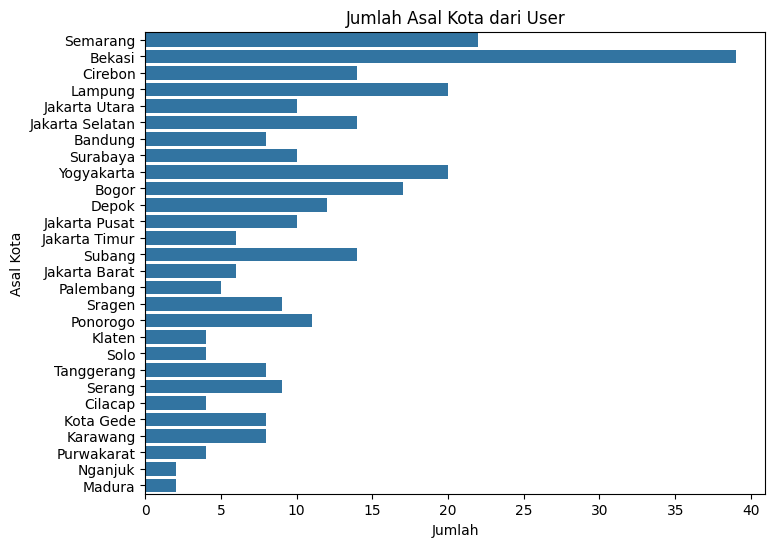

In [21]:
# Filtering the city origin of the user
asal_kota = user['Location'].apply(lambda x : x.split(',')[0])

# Visualization of the city of origin of the user
plt.figure(figsize=(8,6))
sns.countplot(y=asal_kota)
plt.title('Jumlah Asal Kota dari User')
plt.xlabel('Jumlah')
plt.ylabel('Asal Kota')
plt.show()

## **5. Data Preparation**

In [22]:
# Check null value
place_rating.isnull().sum()

User_Id             0
Place_Id            0
Place_Ratings       0
Category         3182
City             3182
Price            3182
Place_Name       3182
dtype: int64

In [23]:
# Delete rows that have NaN values in the 'Place_Name' column
place_rating = place_rating.dropna(subset=['Place_Name'])

In [24]:
# Count the number of Place_Id in place_rating dataset
len(place_rating.Place_Id.unique())

300

In [25]:
# Read dataset for encoding
tourism = place_rating.copy()
tourism.head()

,User_Id,Place_Id,Place_Ratings,Category,City,Price,Place_Name
0,1,179,3,Budaya,Yogyakarta,75000.0,Candi Ratu Boko
1,1,344,2,Bahari,Semarang,3000.0,Pantai Marina
2,1,5,5,Taman Hiburan,Jakarta,94000.0,Atlantis Water Adventure
3,1,373,3,Budaya,Semarang,10000.0,Museum Kereta Ambarawa
5,1,312,2,Cagar Alam,Bandung,11000.0,Taman Hutan Raya Ir. H. Juanda


In [26]:
# Delete duplicates of tourism dataset
tourism = tourism.drop_duplicates('Place_Id')
tourism

,User_Id,Place_Id,Place_Ratings,Category,City,Price,Place_Name
0,1,179,3,Budaya,Yogyakarta,75000.0,Candi Ratu Boko
1,1,344,2,Bahari,Semarang,3000.0,Pantai Marina
2,1,5,5,Taman Hiburan,Jakarta,94000.0,Atlantis Water Adventure
3,1,373,3,Budaya,Semarang,10000.0,Museum Kereta Ambarawa
5,1,312,2,Cagar Alam,Bandung,11000.0,Taman Hutan Raya Ir. H. Juanda
...,...,...,...,...,...,...,...
1760,54,361,1,Taman Hiburan,Semarang,10000.0,Wisata Kampung Krisan Clapar
2008,62,370,1,Budaya,Semarang,5000.0,Benteng Pendem
2399,74,350,4,Bahari,Semarang,5000.0,Pantai Cipta
2448,75,10,2,Bahari,Jakarta,150000.0,Pulau Tidung


In [29]:
tourism.to_csv('place_rating_cleaned.csv', index=False)

In [30]:
from google.colab import files
files.download('place_rating_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>